In [2]:
import xarray as xr
import os
import sys
import matplotlib.pyplot as plt
import importlib as imp
import pandas as pd
import numpy as np
#import nc_time_axis
import cftime
from scipy import stats
from scipy import integrate
import scipy as scipy
import sklearn
import tensorflow as tf
from sklearn import datasets, model_selection
from glob import glob

import setup.fileops as fileops
import setup.processdata as processdata
import setup.expsettings as expsettings

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")
print(f"tensorflow version = {tf.__version__}")

python version = 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:13) [Clang 14.0.6 ]
numpy version = 1.23.2
xarray version = 2024.1.0
tensorflow version = 2.10.0


##### Data Source Location:  
https://portal.nersc.gov/project/m4415/pma/E3SMv2/

Merged member1 bilinear data using CDO env: v2.LR.historical_0101.eam.h1.1850-2014.nc

In [3]:
imp.reload(fileops)
imp.reload(processdata)
imp.reload(expsettings)

settings = expsettings.get_settings("exp101")
directory = '/Users/C830793391/BIG DATA/E3SM Data/'

x_train, x_t = processdata.load_inputs(directory, settings)

<xarray.DataArray 'PRECT' (time: 59235, channel: 1, lat: 30, lon: 260)>
array([[[[ 5.46977130e-10,  6.33937347e-11,  5.27030419e-09, ...,
          -3.04903196e-08, -3.94535284e-08, -3.45817099e-08],
         [ 1.95658991e-08,  1.43143613e-08,  1.08321494e-08, ...,
          -1.36572158e-08, -1.88739051e-08, -1.98839007e-08],
         [ 3.88157808e-08,  2.51429739e-08,  1.52844279e-08, ...,
           6.21294660e-09,  1.10503047e-08,  2.03874819e-08],
         ...,
         [ 1.01330375e-08,  1.29083739e-08,  7.87038790e-09, ...,
          -7.01357772e-09, -8.41770031e-09, -7.85779264e-09],
         [ 6.38827746e-09,  7.54141016e-09,  4.72034900e-09, ...,
          -2.67041556e-10, -4.18494933e-10,  3.02305819e-10],
         [ 2.23883956e-09,  1.79433834e-09,  1.62033442e-09, ...,
           8.96182328e-09,  9.44438394e-09,  8.31393532e-09]]],


       [[[ 2.15360330e-09,  5.05315956e-10,  5.58640068e-09, ...,
          -4.12057055e-08, -4.91742291e-08, -4.82935150e-08],
         [ 1.9

Text(0, 0.5, 'Abnormalities in Precipitation Rate \n (UNITS - mm/s?)')

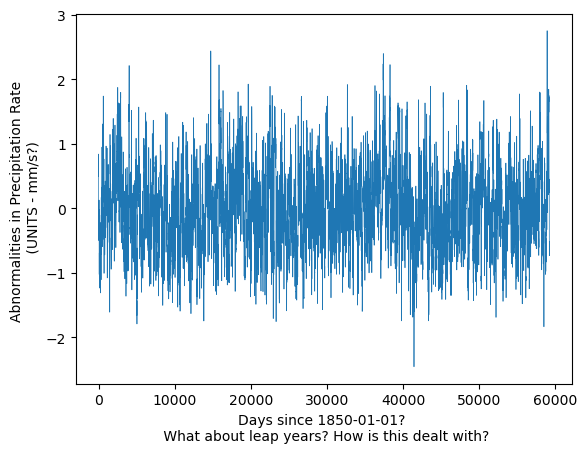

In [18]:
x_t_specificloc = x_t.isel(lat = 0, lon = 100)

plt.figure()
plt.plot(x_t_specificloc, linewidth = 0.5)
plt.xlabel("Days since 1850-01-01? \n What about leap years? How is this dealt with?")
plt.ylabel("Abnormalities in Precipitation Rate \n (UNITS - mm/s?)")